# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [3]:
!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

You should consider upgrading via the '/opt/hostedtoolcache/Python/3.6.11/x64/bin/python -m pip install --upgrade pip' command.


#### Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


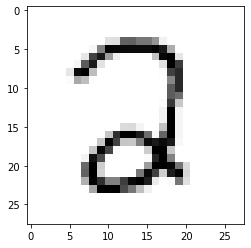

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [15]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [17]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [18]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [20]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [21]:
learner1.train_loop(dl)

Epoch 0 Loss 0.25161190176336323
train accuracy is: 0.4528459355700217, test accuracy is 0.45413306451612906


Epoch 10 Loss 0.23158770180657623
train accuracy is: 0.8014521782674011, test accuracy is 0.8044354838709677


Epoch 20 Loss 0.16732875896555388
train accuracy is: 0.8765648472709063, test accuracy is 0.889616935483871


Epoch 30 Loss 0.08737067588309583
train accuracy is: 0.9176264396594892, test accuracy is 0.9299395161290323


Epoch 40 Loss 0.05852895935168602
train accuracy is: 0.9379903188115507, test accuracy is 0.9475806451612904


Epoch 50 Loss 0.04667427021347391
train accuracy is: 0.9480053413453514, test accuracy is 0.9566532258064516


Epoch 60 Loss 0.0404530161359274
train accuracy is: 0.9537639793022867, test accuracy is 0.9616935483870968


Epoch 70 Loss 0.03658706102466044
train accuracy is: 0.958103822400267, test accuracy is 0.9657258064516129


Epoch 80 Loss 0.03390588205575948
train accuracy is: 0.9601902854281422, test accuracy is 0.9667338709677419


Epoch 90 Loss 0.03190473028791864
train accuracy is: 0.9623602069771323, test accuracy is 0.9667338709677419


Epoch 100 Loss 0.03032525094035193
train accuracy is: 0.9645301285261225, test accuracy is 0.967741935483871


Epoch 110 Loss 0.029040918048289056
train accuracy is: 0.9661992989484226, test accuracy is 0.9707661290322581


Epoch 120 Loss 0.027947192870101112
train accuracy is: 0.9677850108496078, test accuracy is 0.9717741935483871


Epoch 130 Loss 0.026997946506987492
train accuracy is: 0.9685361375396428, test accuracy is 0.9727822580645161


Epoch 140 Loss 0.02615932253611451
train accuracy is: 0.9692038057085628, test accuracy is 0.9742943548387096


Epoch 150 Loss 0.02541019946445583
train accuracy is: 0.9697880153563679, test accuracy is 0.9742943548387096


Epoch 160 Loss 0.02472948822997762
train accuracy is: 0.970288766483058, test accuracy is 0.9747983870967742


Epoch 170 Loss 0.02410702249462374
train accuracy is: 0.971039893173093, test accuracy is 0.9747983870967742


Epoch 180 Loss 0.023526003769247426
train accuracy is: 0.9721248539475881, test accuracy is 0.9742943548387096


Epoch 190 Loss 0.022985568518803547
train accuracy is: 0.9732932732431981, test accuracy is 0.9742943548387096


Epoch 200 Loss 0.02246827985198632
train accuracy is: 0.9735436488065431, test accuracy is 0.9753024193548387


Epoch 210 Loss 0.021974924251243574
train accuracy is: 0.9743782340176932, test accuracy is 0.9753024193548387


Epoch 220 Loss 0.021510681556638846
train accuracy is: 0.9752128192288433, test accuracy is 0.9753024193548387


Epoch 230 Loss 0.02107124844930917
train accuracy is: 0.9757970288766483, test accuracy is 0.9758064516129032


Epoch 240 Loss 0.020652604167846974
train accuracy is: 0.9765481555666834, test accuracy is 0.9747983870967742


0.04211470687885842

##### Now running only the logistic regression based classification to compare results with NN

In [22]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [23]:
learner2.train_loop(dl)

Epoch 0 Loss 0.26672660656600167
train accuracy is: 0.5923051243531965, test accuracy is 0.5700604838709677


Epoch 10 Loss 0.10300929026767387
train accuracy is: 0.9057753296611584, test accuracy is 0.9158266129032258


Epoch 20 Loss 0.07955399419538174
train accuracy is: 0.9233016190953096, test accuracy is 0.9324596774193549


Epoch 30 Loss 0.06887122465597681
train accuracy is: 0.9327324319813053, test accuracy is 0.9415322580645161


Epoch 40 Loss 0.06240279451228378
train accuracy is: 0.9379903188115507, test accuracy is 0.9455645161290323


Epoch 50 Loss 0.05795056990814853
train accuracy is: 0.941745952261726, test accuracy is 0.9490927419354839


Epoch 60 Loss 0.05464920123457101
train accuracy is: 0.943832415289601, test accuracy is 0.952116935483871


Epoch 70 Loss 0.0520783330731282
train accuracy is: 0.9465865464863963, test accuracy is 0.9556451612903226


Epoch 80 Loss 0.050003513632075794
train accuracy is: 0.9482557169086964, test accuracy is 0.9586693548387096


Epoch 90 Loss 0.048284218567983005
train accuracy is: 0.9498414288098815, test accuracy is 0.9596774193548387


Epoch 100 Loss 0.04683008091820685
train accuracy is: 0.9509263895843766, test accuracy is 0.9601814516129032


Epoch 110 Loss 0.04557797633556508
train accuracy is: 0.9520948088799867, test accuracy is 0.9606854838709677


Epoch 120 Loss 0.04448521112999996
train accuracy is: 0.9532632281755967, test accuracy is 0.9606854838709677


Epoch 130 Loss 0.043520655826536525
train accuracy is: 0.9536805207811717, test accuracy is 0.9611895161290323


Epoch 140 Loss 0.042661023209096
train accuracy is: 0.9549323985978968, test accuracy is 0.9616935483870968


Epoch 150 Loss 0.04188778351985104
train accuracy is: 0.9558504423301619, test accuracy is 0.9621975806451613


Epoch 160 Loss 0.041188734812289435
train accuracy is: 0.956685027541312, test accuracy is 0.9632056451612904


Epoch 170 Loss 0.04055083920736313
train accuracy is: 0.957102320146887, test accuracy is 0.9632056451612904


Epoch 180 Loss 0.03996657545856662
train accuracy is: 0.957436154231347, test accuracy is 0.9632056451612904


Epoch 190 Loss 0.03942842289782444
train accuracy is: 0.958020363879152, test accuracy is 0.9632056451612904


Epoch 200 Loss 0.03893060680337789
train accuracy is: 0.9585211150058421, test accuracy is 0.9632056451612904


Epoch 210 Loss 0.038468456045904494
train accuracy is: 0.9586880320480721, test accuracy is 0.9642137096774194


Epoch 220 Loss 0.0380379120945519
train accuracy is: 0.9586880320480721, test accuracy is 0.9647177419354839


Epoch 230 Loss 0.03763574384452906
train accuracy is: 0.9588549490903021, test accuracy is 0.9657258064516129


Epoch 240 Loss 0.03725818449357384
train accuracy is: 0.9593557002169921, test accuracy is 0.9657258064516129


0.02712179639337587

### Comparing results of NN and LR

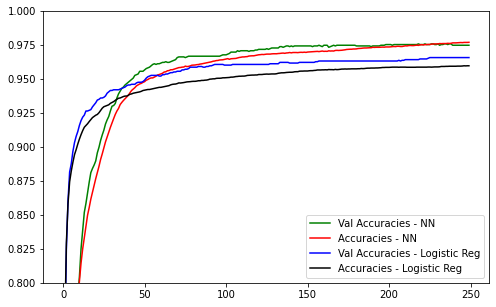

In [24]:
plt.figure(figsize=(8,5))
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - Logistic Reg")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR

##### Now we will be moving through the network, till the output of the second last affine where we get a 2 dimensional output. We will be plotting this 2d output and probability contours

In [25]:
model_new = Model(layers[:-2])

In [26]:
plot_testing = model_new(testing_xdata)

##### Plotting the scatter plot of points and color coding by class

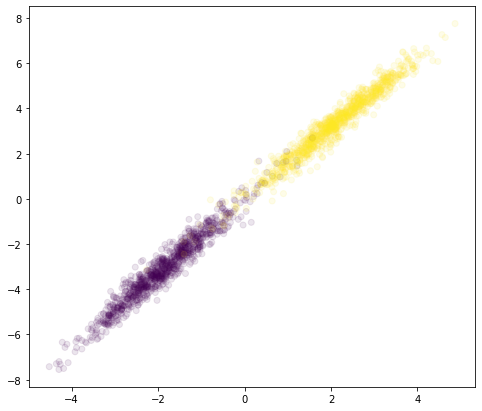

In [27]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());

##### Plotting probability contours

In [28]:
model_prob = Model(layers[-2:]) ## picking only last two layers to get probability. That is affine followed by sigmoid

In [29]:
xgrid = np.linspace(-4, 1, 100) ## Adjust these values based on above chart, roughly -4 to 1
ygrid = np.linspace(-7.5, 7.5, 100) ## Adjust these values based on above chart, roughly -7.5, 7.5
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100, lets convert them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

## xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) ## Please note vstack takes in a tuple
X = X_interim.T

## We want a shape of n rows and 2 columns to be able to feed this to last affine
## This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) ## to make it consistent with xg, yg

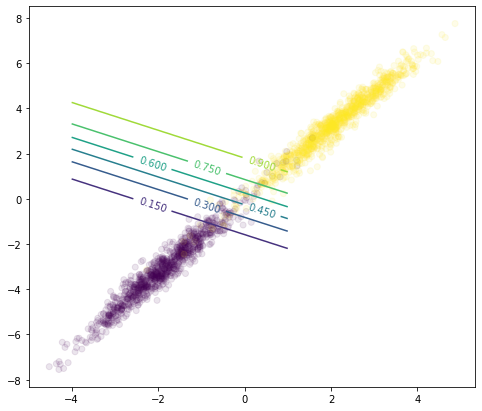

In [30]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );